## Imports

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from math import exp, sqrt, log
from scipy.linalg import expm
from IPython.display import clear_output
# Need Diff.py file, change path accordingly
from Diff import *
import torch_geometric as pyg
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint

In [2]:
facebook = pd.read_csv(
    "data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)

''' 
Downloaded from http://snap.stanford.edu/data/ego-Facebook.html

'''
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
G.number_of_nodes() #4039

4039

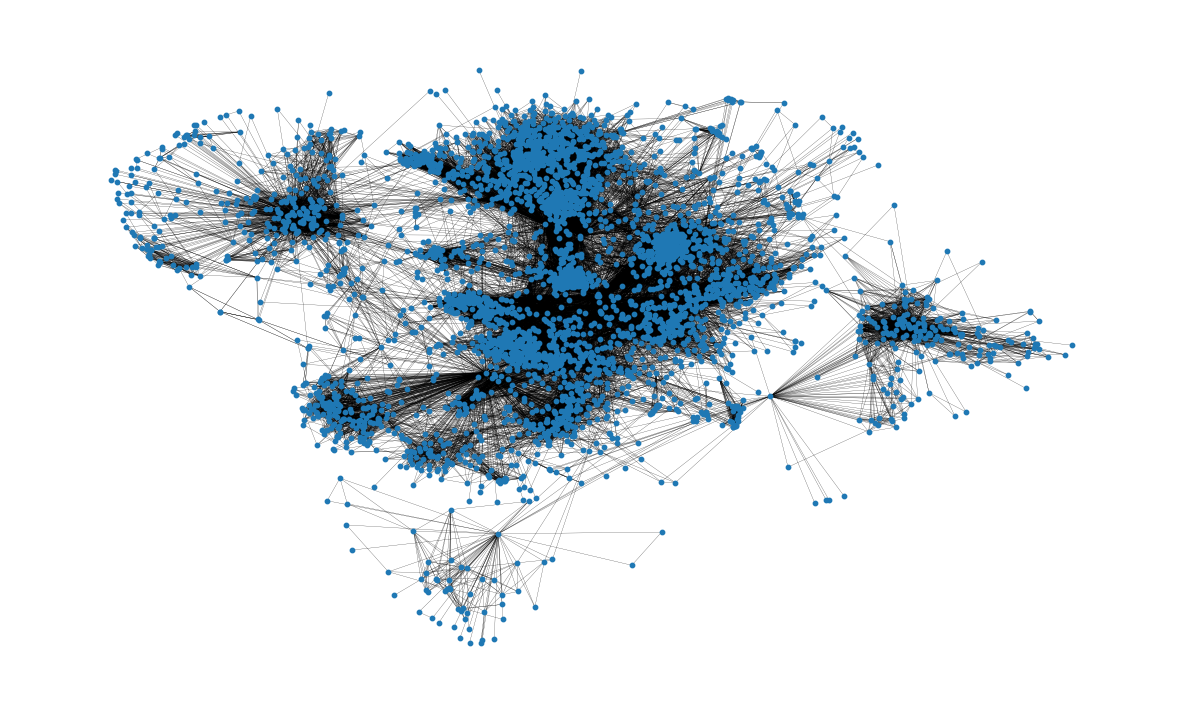

In [3]:
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [4]:
A = nx.adjacency_matrix(G).todense()
L = nx.laplacian_matrix(G).toarray()


n = G.number_of_nodes()
x0 = np.zeros(n)
activ = np.random.choice(n, int(0.2*n))
x0[activ] = 100

In [5]:
# Visualization parameters

vmin = 0
vmax = 100
cmap = plt.cm.get_cmap('jet') # plt.cm.Blues/Reds/etc... OR plt.cm.get_cmap('jet/rainbow/etc...')

'''https://matplotlib.org/stable/tutorials/colors/colormaps.html'''

node_size = 10
labels = False

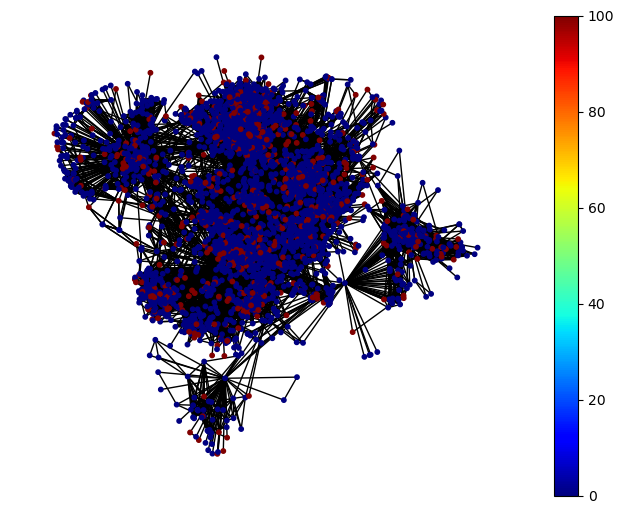

In [6]:
nx.draw(G, pos=pos, with_labels=labels, node_color=x0, cmap=cmap, node_size=node_size, vmin=vmin, vmax=vmax)
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)))
plt.show()

In [7]:
diff = diffusion(L, x0, T=1)

/Users/alessio/Desktop/Postdoc/Graph diffusion/polysurrogate_graph_diffusion/Diff.py:36: ComplexWarning: Casting complex values to real discards the imaginary part
  E = np.array([exp(-C*i*t) for i in lmb]) # vector of eigenvalues exponentials


In [8]:
def show_diffusion(data):

  '''
  ARGUMENTS:
    data : 2D Numpy array. Matrix of states of the nodes as time progresses.

  OUTPUT:
    none

  The function plots each iteration of the diffusion solver, so we get a time sequence of the "quantities" in each node of the graph.
  '''

  for i in range(data.shape[1]):
    nx.draw(G, pos=pos, with_labels=labels, node_color = np.array(data[:,i]), node_size=node_size, vmin=vmin, vmax=vmax, cmap = cmap)
    #plt.title('Diffusion at t = ' + str(round(i/10, 2)))
    plt.title('Iteration ' + str(i))
    plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax)))
    plt.show()
    clear_output(wait=True)

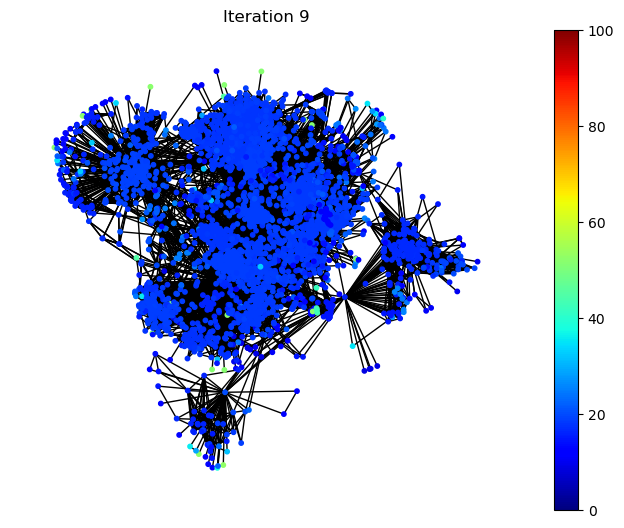

In [11]:
show_diffusion(diff)

In [13]:
def plot_diffusion(data, nodes):

  '''
  ARGUMENTS:
    data : 2D Numpy array. Matrix of states of the nodes as time progresses.
    nodes : list of integers in the range 0 to n. Contains the labels of the nodes we want to see in the plot.

  OUTPUT:
    none

  This function plots the evolutions of the "quantities" in the chosen nodes as a function of time.
  '''

  for node in nodes:
    plt.plot(data[node, :], label=str(node))
    plt.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), fontsize='small')
  plt.xlabel('t')
  plt.ylabel('$u_i(t)$')
  plt.show()

/Users/alessio/opt/anaconda3/envs/gnn_id/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/alessio/opt/anaconda3/envs/gnn_id/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/alessio/opt/anaconda3/envs/gnn_id/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/alessio/opt/anaconda3/envs/gnn_id/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/alessio/opt/anaconda3/envs/gnn_id/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the 

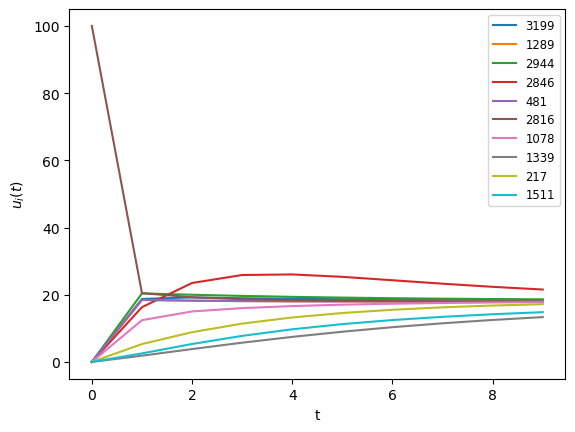

In [15]:
nodes_diff = [np.random.randint(G.number_of_nodes()) for _ in range(10)]

plot_diffusion(diff, nodes_diff)

2694